In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [25]:
#compradores = df_events.loc[df_events["event"] == "conversion",:]
compradores = df_events[["person","model","event","country"]]
#compradores_ch = compradores.loc[compradores["event"] == "checkout"]
compradores_con = compradores.loc[compradores["event"] == "conversion"]
a = compradores_con["person"].value_counts().head(20).sort_index()
a
#compradores_ti = compradores_con.drop_duplicates(subset='person')['person'].tolist()
#compradores_ti

0ee60361     6
1072db20     6
19b38ba2     7
252adec6    15
2925e132     7
2a3a0a61     6
4200bdee    12
48d14aeb     7
6b07be7b     6
a0d4baef    11
a7713c81     7
a925072a     7
a96e304b     8
ba325a6b    10
baa40260     7
d12fbe38     8
d38f5851     6
e883f03a     7
f3a682fb     7
f646efa2     8
Name: person, dtype: int64

In [27]:
compradores_ch.count()
#usuarios_nuevos = compradores_ch.drop_duplicates(subset='person')['person'].tolist()

#compradores_ch = compradores.loc[(compradores['person'].isin(usuarios_nuevos))&(compradores["event"] == "checkout")]
compradores_ti = a.index.tolist()
compradores_cch = compradores.loc[(compradores['person'].isin(compradores_ti))&(compradores["event"] == "checkout")]

b = compradores_cch["person"].value_counts().head(20).sort_index()
b

0ee60361     1
1072db20    13
19b38ba2    23
252adec6     4
2925e132    14
2a3a0a61     7
4200bdee    11
48d14aeb    14
6b07be7b    13
a0d4baef    20
a7713c81     5
a925072a     9
a96e304b    13
ba325a6b     2
baa40260    13
d12fbe38     2
d38f5851    19
e883f03a     6
f3a682fb     9
f646efa2     8
Name: person, dtype: int64

In [11]:
"""a = compradores_con["person"].value_counts().sort_index().head(20)
a"""

00204059    1
00c13dee    1
00fdbb4b    1
0146a9df    1
01db2fe6    1
02a6f9b5    1
03bdcd81    1
042a2a99    1
04850add    1
04fbc241    1
0562e9d2    2
0585daeb    1
058d40c3    1
0624fb8e    1
06c1730a    1
06cbe382    1
0793fc28    2
079f4c7c    1
07cd981f    1
07ce78e5    1
Name: person, dtype: int64

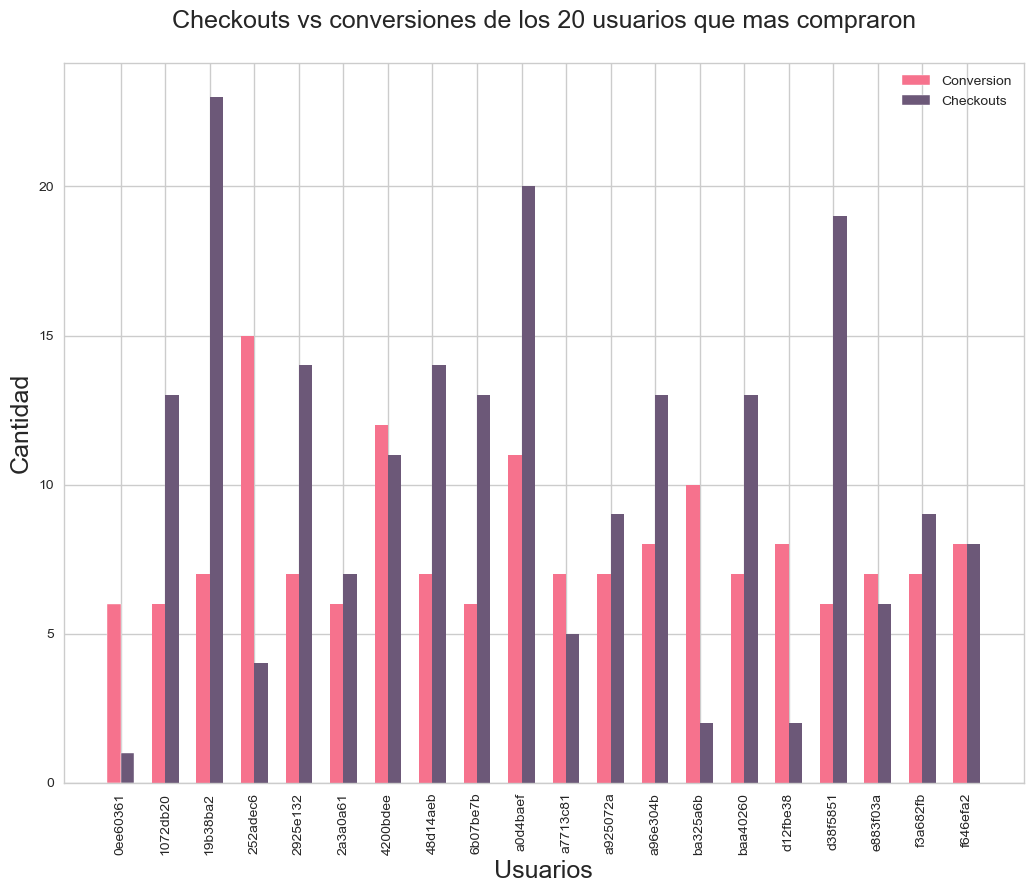

In [51]:
X = np.arange (len(compradores_ti))
Y1 = a.values
Y2 = b.values

plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.15 ,Y1,facecolor = "#F6728D",label = "Conversion", width = 0.3, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y2,facecolor = "#6C5878",label = "Checkouts", width = 0.3, align = "center",edgecolor = "white")


plt.xticks(X,compradores_ti,fontsize = 10,rotation='vertical')
plt.xlabel("Usuarios",fontsize = 18)
plt.ylabel('Cantidad', fontsize = 18)

plt.title('Checkouts vs conversiones de los 20 usuarios que mas compraron\n', fontsize = 18)

plt.legend(loc="upper right")
plt.show()